# **Punto 1: Gibbs Sampler para el modelo Hard-Core**

## Implementacion:

In [ ]:
class HardCore:
    """
    Una clase para representar, simular y visualizar el algoritmo gibbs sampler para el modelo hard-core.

    ...

    Attributes
    ----------
    matrix : list
        Matriz que representa el grafo
    n : int
        Tamaño de la matriz
    G : int
        Objeto Graph de la libreria NetworkX

    """

    def __init__(self, n, matrix=0) -> None:
        self.matrix = matrix if matrix != 0 else [[ 0 for _ in range(n)] for _ in range(n)]
        self.n = n
        self.G = None

    # UTILIDADES

    def num_to_vertex(self) -> tuple:
        """
        Retorna una la posicion de un vertice escogido aleatoriamente.

            Args:
                None
            Returns:
                _ (tuple):  Posición del vertice en formato (fila, columna).
        """
        from random import randint as random

        r = random(1, self.n**2)

        row = int(r/self.n) if int(r/self.n) != r/self.n else int(r/self.n)-1
        col = r%self.n if r%self.n != 0 else self.n

        return (row-1,col-1)

    def flip_a_coin(self) -> int:
        """
        Retorna un 1 o un 0 seleccionado con misma probabiliad.

            Args:
                None
            Returns:
                _ (int): Resultado de la seleccion.
        """
        from random import randint
        return randint(0,1)

    def neighbors_checker(self, vertex) -> bool:
        """
        Verifica si el vertice dado no tiene vertices adyacentes que contengan un 1.

            Args:
                vertex (tuple): Posicion del veertice en formato (fila, columna).
            Returns:
                _ (bool): True si cumple la condicion. False en otro caso.
        """
        row, col = vertex

        if row > 0:
            if self.matrix [row - 1][col] == 1: return False
        if row < self.n-1:
            if self.matrix [row + 1][col] == 1: return False
        if col > 0:
            if self.matrix [row][col - 1] == 1: return False
        if col < self.n-1:
            if self.matrix [row][col + 1] == 1: return False

        return True

    def count_ones(self):
        """
        Cuenta el numero de unos de la matriz

            Args:
                None
            Returns:
                _ (int): Numero de unos en la matriz
        """
        return sum([ x.count(1) for x in self.matrix ])

    # RESULTADOS

    def is_factible(self):
        """
        Verifica que la matriz sea factible.

            Args:
                None
            Returns:
                _ (bool): True si es factible. False en otro caso.
        """
        for i in range(self.n):
            for j in range(self.n):
                if self.matrix[i][j] == 1:
                  if not self.neighbors_checker((i,j)) : return False
        return True

    def expected_value(self):
        """
        Usa el promedio de unos en la matriz para estimar el valor esperado de la cadena.

            Args:
                None
            Returns:
                _ (float): Promedio de unos en la matriz
        """
        return self.count_ones()/(self.n**2)

    # SIMULACION

    def simulate(self, n=10000, step=[]) -> None:
        """
        Simula el paso en el tiempo de la cadena de markov usando el algoritmo de Gibbs.

            Args:
                n (int): Numero de iteraciones del algoritmo.
                step (int): Paso del algoritmo que se quiere visualizar
            Returns:
                None
        """

        for i in range(n):
            #Visualiza en el paso requerido
            if i in step: self.plot(i=i)

            #Selecciona un vetice aleatorio
            vertex = self.num_to_vertex()

            #Tira la moneda
            if self.flip_a_coin() == 1:
                if self.neighbors_checker(vertex): # Revisa los vecinos
                    self.matrix[vertex[0]][vertex[1]] = 1
            else:
                self.matrix[vertex[0]][vertex[1]] = 0

    # VISUALIZACION

    def generate_graph(self):
        """
        Transforma la matriz en un objeto Graph de la libreria NetworkX.

            Args:
                None
            Returns:
                None
        """
        import networkx as nx

        self.G = nx.Graph()

        # Agregar nodos
        n = len(self.matrix)
        for i in range(n):
            for j in range(n):
                if self.matrix[i][j] == 0:
                    color = "gray"
                else:
                    color = "red"
                self.G.add_node((i, j), color=color)  # Guardar posicion y color del nodo

        # Agregar aristas horizontales y verticales
        for i in range(n):
            for j in range(n):
                if i < n - 1:
                    self.G.add_edge((i, j), (i + 1, j))
                if j < n - 1:
                    self.G.add_edge((i, j), (i, j + 1))

    def plot(self, i=-1):
        """
        Muestra una visualizacion del grafo de la matriz.

            Args:
                i (int): Paso en el que se encuentra el algortimo
            Returns:
                None
        """
        import matplotlib.pyplot as plt
        import networkx as nx

        if i > -1: print(f"Estado de la matriz {self.n}x{self.n} en el tiempo {i}")
        else:
          print(f"Estado actual de la matriz de tamaño {self.n}x{self.n}:")
          print("Es factible" if self.is_factible() else "No es factible")

        self.generate_graph()

        pos = {(x, y): (y, -x) for x, y in self.G.nodes()}  # Rotar 90 grados (Bug de la libreria)
        node_colors = [self.G.nodes[node]['color'] for node in self.G.nodes()]

        nx.draw(self.G, pos, with_labels=False, node_size=int(30000/self.n**2), node_color=node_colors, edge_color='black', linewidths=1, font_color='black', font_size=10)
        plt.gca().set_aspect('equal', adjustable='box')  # Ajustar aspect ratio
        plt.show()


## Visualización:

### Manual

Estado de la matriz 9x9 en el tiempo 100


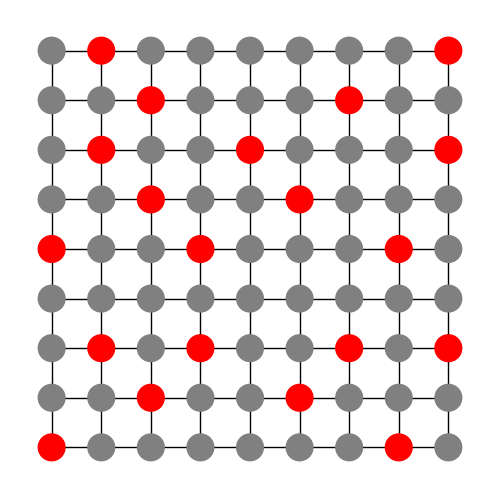

Estado actual de la matriz de tamaño 9x9:
Es factible


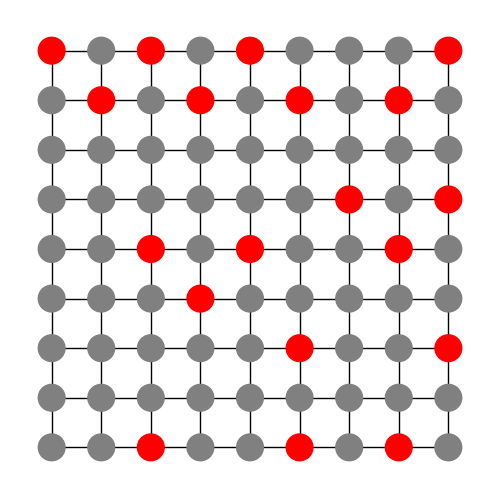

In [ ]:
k = 9 # Tamaño de la matriz
X = 10000 # Tiempo final
s = [100] # pasos a visualizar // s_{1} < X

m1 = HardCore(n=k)
m1.simulate(step = s)
m1.plot()

### Configuracion final en rejillas $ k \times k$ $ (≈ 3 \leq k \leq 20) $

Estado actual de la matriz de tamaño 3x3:
Es factible


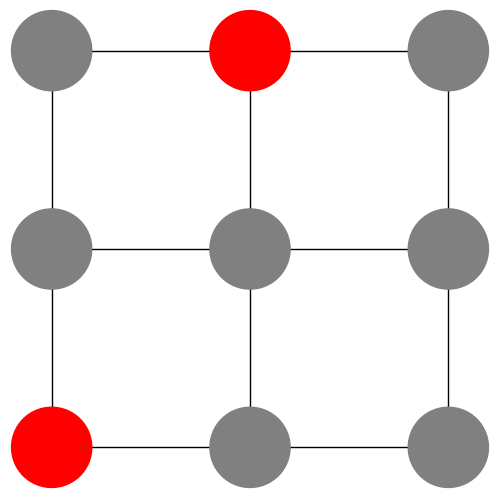

Estado actual de la matriz de tamaño 4x4:
Es factible


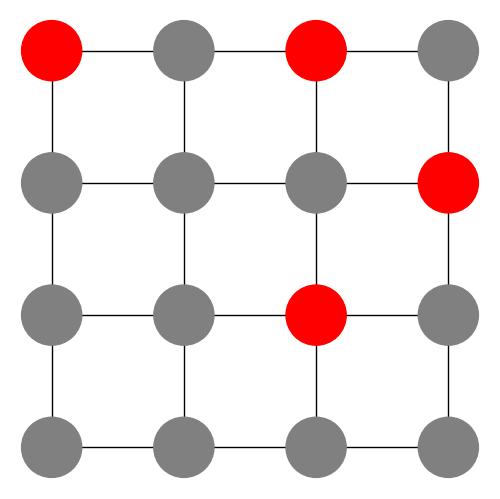

Estado actual de la matriz de tamaño 5x5:
Es factible


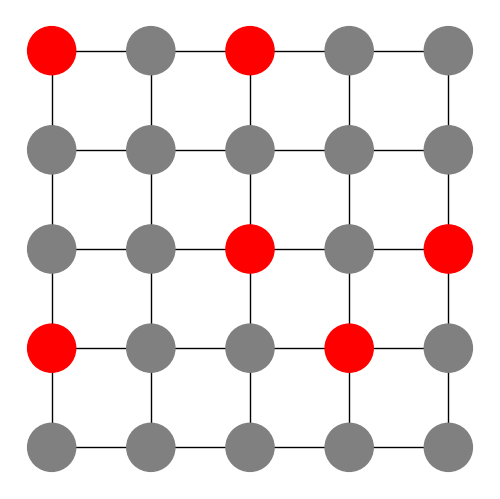

Estado actual de la matriz de tamaño 6x6:
Es factible


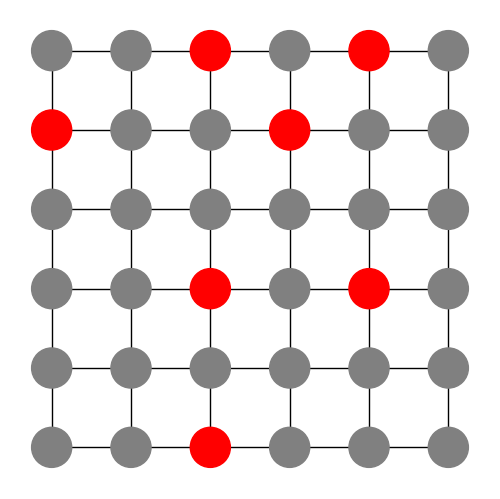

Estado actual de la matriz de tamaño 7x7:
Es factible


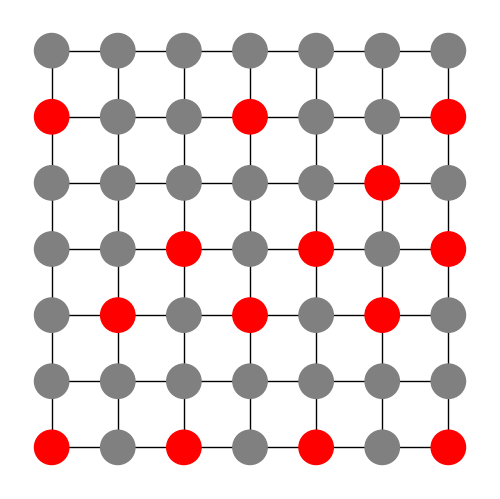

Estado actual de la matriz de tamaño 8x8:
Es factible


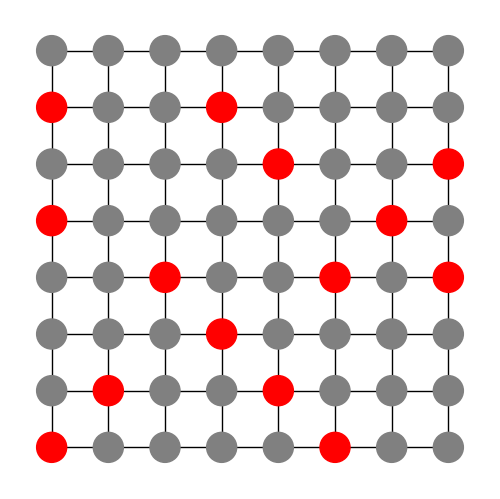

Estado actual de la matriz de tamaño 9x9:
Es factible


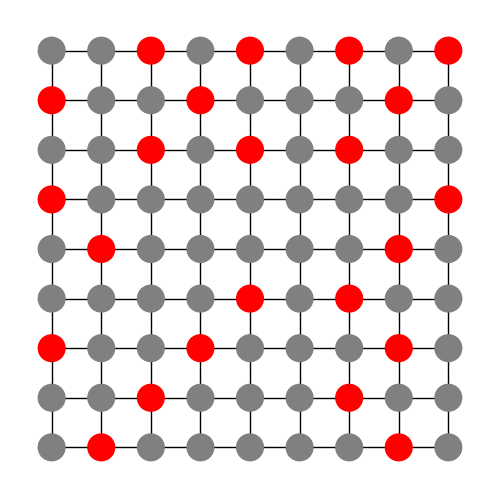

Estado actual de la matriz de tamaño 10x10:
No es factible


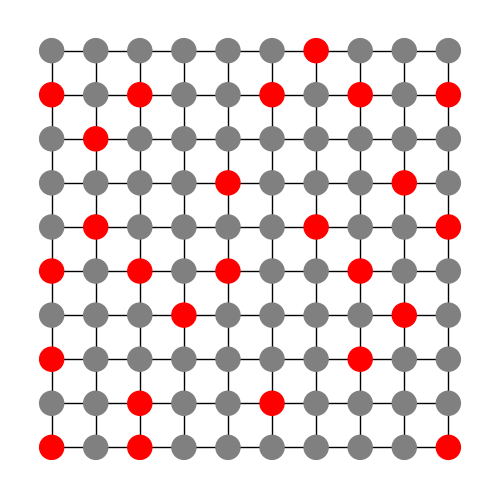

Estado actual de la matriz de tamaño 11x11:
Es factible


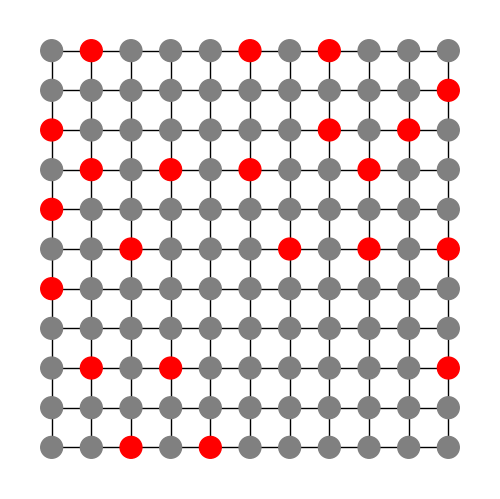

Estado actual de la matriz de tamaño 12x12:
Es factible


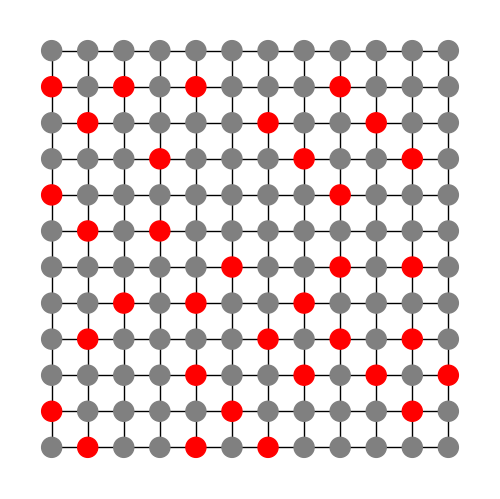

Estado actual de la matriz de tamaño 13x13:
Es factible


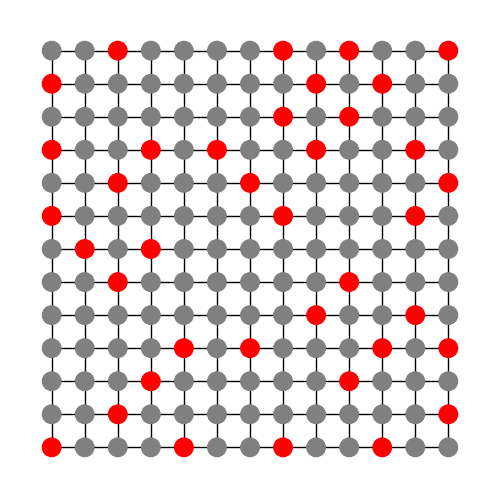

Estado actual de la matriz de tamaño 14x14:
No es factible


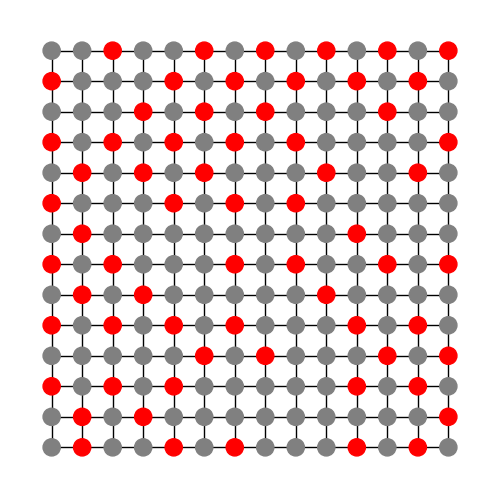

Estado actual de la matriz de tamaño 15x15:
No es factible


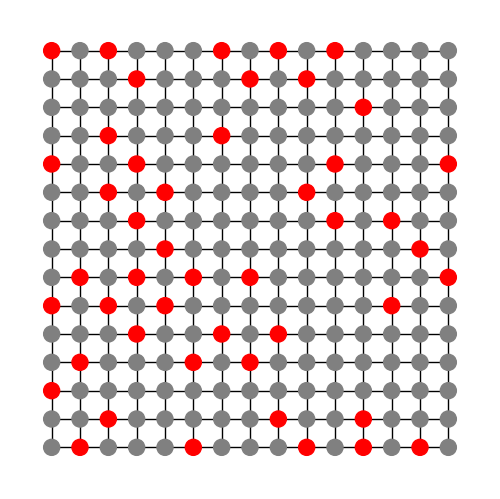

Estado actual de la matriz de tamaño 16x16:
Es factible


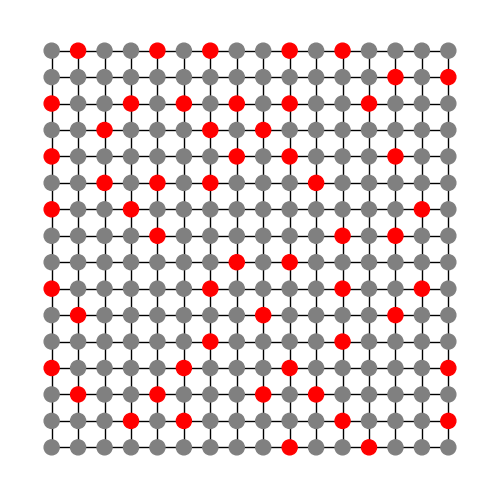

Estado actual de la matriz de tamaño 17x17:
No es factible


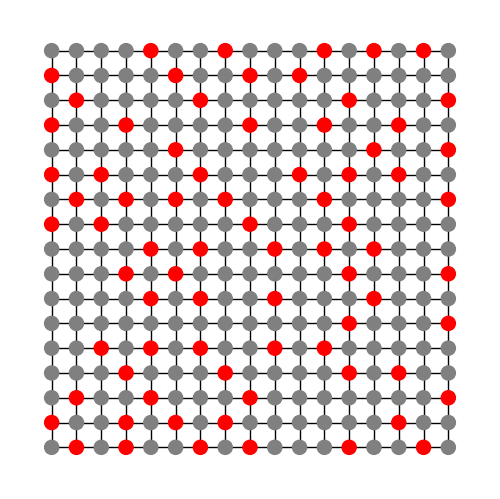

Estado actual de la matriz de tamaño 18x18:
No es factible


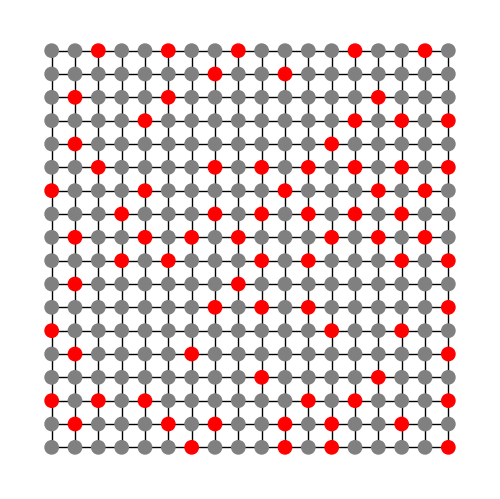

Estado actual de la matriz de tamaño 19x19:
No es factible


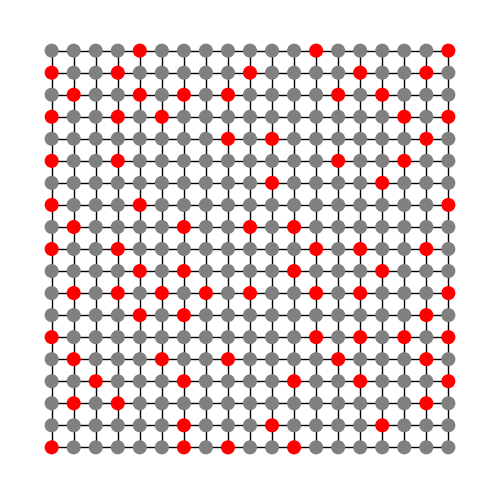

Estado actual de la matriz de tamaño 20x20:
Es factible


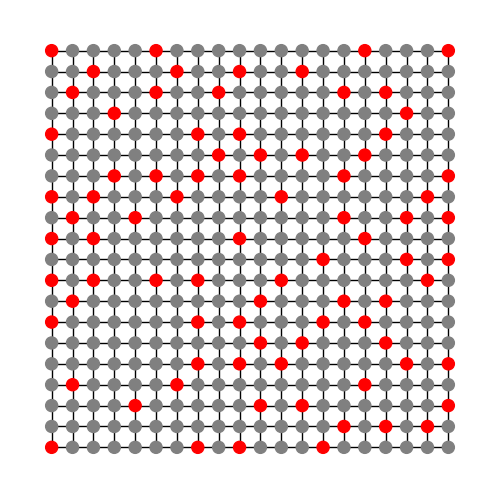

In [ ]:
X = 10000 # Tiempo final
s = [] # pasos a visualizar // s_{1} < X

for k in range(3,21): # Tamaño de la matriz
  m1 = HardCore(n=k)
  m1.simulate(step = s)
  m1.plot()

# Punto 2: Estimar numero de partiuculas

## Implementacion:

In [ ]:
X = 10000 # Tiempo final
s = [] # pasos a visualizar // s1_{1} < X1
ones = []

for k in range(3,21): # Tamaño de la matriz
  m1 = HardCore(n=k)
  m1.simulate(n = X, step = s)
  ones.append(m1.count_ones())

X2 = 100000 # Tiempo final
s2 = [] # pasos a visualizar // s2_{1} < X2
ones2 = []

for k in range(3,21): # Tamaño de la matriz
  m2 = HardCore(n=k)
  m2.simulate(n = X2, step = s2)
  ones2.append(m2.count_ones())



## Visualización:

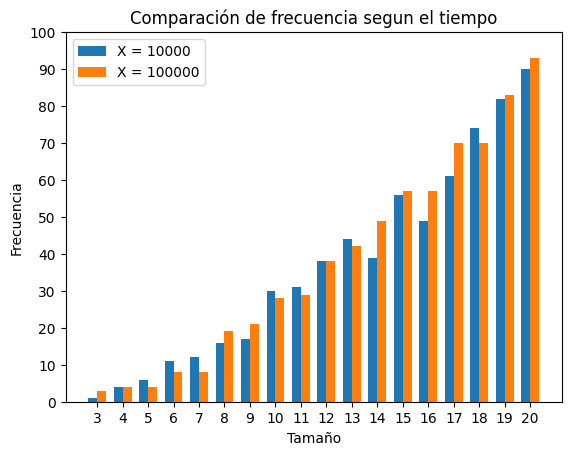

In [ ]:
import matplotlib.pyplot as plt

bar_width = 0.35
index = [x for x in range(3,21)]
index2 = [x + bar_width for x in index]

fig, ax = plt.subplots()

bar1 = plt.bar(index, ones, bar_width, label = 'X = 10000')
bar2 = plt.bar(index2, ones2, bar_width, label = 'X = 100000')

ax.set_xticks([x + bar_width / 2 for x in index])
ax.set_yticks([x for x in range(0, max(max(ones), max(ones2)) + 10, 10)])
ax.set_xticklabels(index)

ax.set_xlabel('Tamaño')
ax.set_ylabel('Frecuencia')
ax.set_title('Comparación de frecuencia segun el tiempo')
ax.legend()

plt.show()

a